In [1]:
#import packages
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def parse_row(row):
    row = row.split(".")[0]
    return row

def to_hyperthyroid(row):
    if row != "negative":
        row = "hyperthyroid"
    return row

def to_hypothyroid(row):
    if row != "negative":
        row = "hypothyroid"
    return row



In [3]:
columns = ['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'category']

In [4]:
hyper_data = pd.read_csv("allhyper.csv", names=columns)
hypo_data = pd.read_csv("allhypo.csv", names=columns)
sick_data = pd.read_csv("sick.csv", names=columns)

In [5]:
hyper_data.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'category'],
      dtype='object')

In [6]:
hyper_data['category'] = hyper_data['category'] \
                            .apply(parse_row) \
                            .apply(to_hyperthyroid)

hypo_data['category'] = hypo_data['category'] \
                            .apply(parse_row) \
                            .apply(to_hypothyroid)

sick_data['category'] = sick_data['category'] \
                            .apply(parse_row)

In [7]:
thyroid_frames = [hyper_data, hypo_data, sick_data]
thyroid_data = pd.concat(thyroid_frames) \
                 .drop_duplicates() \
                 .drop(['TBG', 'TBG measured'], axis=1)

In [8]:
classes = thyroid_data['category'].unique()

In [9]:
thyroid_data.shape

(3221, 28)

In [10]:
thyroid_data.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
referral source              0
category                     0
dtype: int64

<AxesSubplot:>

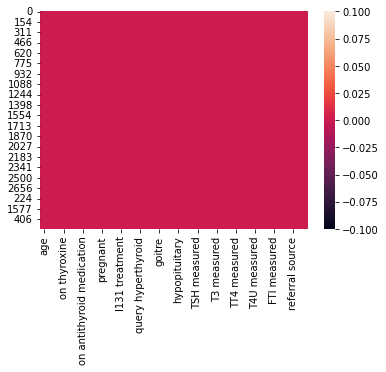

In [11]:
sns.heatmap(thyroid_data.isnull())

In [12]:
print("Number of samples:", len(thyroid_data))

Number of samples: 3221


In [13]:
thyroid_data.head(5)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source,category
0,41,F,f,f,f,f,f,f,f,f,...,t,2.5,t,125,t,1.14,t,109,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,2,t,102,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,f,?,t,109,t,0.91,t,120,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,1.9,t,175,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,1.2,t,61,t,0.87,t,70,SVI,negative


In [14]:
thyroid_data['referral source'].value_counts()

other    1795
SVI       994
SVHC      289
STMW      106
SVHD       37
Name: referral source, dtype: int64

In [15]:
thyroid_data['category'].value_counts()

negative        2753
hypothyroid      220
sick             171
hyperthyroid      77
Name: category, dtype: int64

In [16]:
thyroid_data.describe()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source,category
count,3221,3221,3221,3221,3221,3221,3221,3221,3221,3221,...,3221,3221,3221,3221,3221,3221,3221,3221,3221,3221
unique,94,3,2,2,2,2,2,2,2,2,...,2,65,2,218,2,139,2,210,5,4
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,t,?,other,negative
freq,91,2108,2878,3173,3186,3080,3175,3180,3165,3010,...,2632,589,3079,142,2945,276,2947,274,1795,2753


#binary_cols=['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'category']
#for col in binary_cols: convert_category(thyroid_data, col)

In [17]:
thyroid_data.dtypes

age                          object
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
referral source              object
category                    

In [18]:
#replace the '?' values with numpy nan
for column in thyroid_data.columns:
    count=thyroid_data[column][thyroid_data[column]=='?'].count()
    if count != 0:
        print(column,thyroid_data[column][thyroid_data[column]=='?'].count())

age 1
sex 127
TSH 247
T3 589
TT4 142
T4U 276
FTI 274


In [19]:
for column in thyroid_data.columns:
    count=thyroid_data[column][thyroid_data[column]== '?'].count()
    if count!=0:
        thyroid_data[column]=thyroid_data[column].replace('?',np.nan)

In [20]:
for column in thyroid_data.columns:
    count=thyroid_data[column][thyroid_data[column]=='?'].count()
    if count == 0:
        print(column,thyroid_data[column][thyroid_data[column]=='?'].count())

age 0
sex 0
on thyroxine 0
query on thyroxine 0
on antithyroid medication 0
sick 0
pregnant 0
thyroid surgery 0
I131 treatment 0
query hypothyroid 0
query hyperthyroid 0
lithium 0
goitre 0
tumor 0
hypopituitary 0
psych 0
TSH measured 0
TSH 0
T3 measured 0
T3 0
TT4 measured 0
TT4 0
T4U measured 0
T4U 0
FTI measured 0
FTI 0
referral source 0
category 0


In [21]:
##  Unique Values
for column in thyroid_data.columns:
    print(column,(thyroid_data[column].unique()))

age ['41' '23' '46' '70' '18' '59' '80' '66' '68' '84' '67' '71' '28' '65'
 '42' '63' '51' '81' '54' '55' '60' '25' '73' '34' '78' '37' '85' '26'
 '58' '64' '44' '48' '61' '35' '83' '21' '87' '53' '77' '27' '69' '74'
 '38' '76' '45' '36' '22' '43' '72' '82' '31' '39' '49' '62' '57' '1' '50'
 '30' '29' '75' '19' '7' '79' '17' '24' '15' '32' '47' '16' '52' '33' '13'
 '10' '89' '56' '20' '90' '40' '88' '14' '86' '94' '12' '4' '11' '8' '5'
 '455' '2' '91' '6' nan '93' '92']
sex ['F' 'M' nan]
on thyroxine ['f' 't']
query on thyroxine ['f' 't']
on antithyroid medication ['f' 't']
sick ['f' 't']
pregnant ['f' 't']
thyroid surgery ['f' 't']
I131 treatment ['f' 't']
query hypothyroid ['f' 't']
query hyperthyroid ['f' 't']
lithium ['f' 't']
goitre ['f' 't']
tumor ['f' 't']
hypopituitary ['f' 't']
psych ['f' 't']
TSH measured ['t' 'f']
TSH ['1.3' '4.1' '0.98' '0.16' '0.72' '0.03' nan '2.2' '0.6' '2.4' '1.1' '2.8'
 '3.3' '12' '1.2' '1.5' '6' '2.1' '0.1' '0.8' '1.9' '3.1' '0.2' '13' '0.3'
 '0.035' 

In [22]:
# A quick fix needed
thyroid_data.loc[thyroid_data['age'] == '455', 'age'] = '45'

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
thyroid_data['age'] = le.fit_transform(thyroid_data["age"])

In [25]:
thyroid_data['sex'] = le.fit_transform(thyroid_data["sex"])

In [26]:
thyroid_data['on thyroxine'] = le.fit_transform(thyroid_data["on thyroxine"])

In [27]:
thyroid_data['query on thyroxine'] = le.fit_transform(thyroid_data["query on thyroxine"])

In [28]:
thyroid_data['on antithyroid medication'] = le.fit_transform(thyroid_data["on antithyroid medication"])

In [29]:
thyroid_data['sick'] = le.fit_transform(thyroid_data["sick"])

In [30]:
thyroid_data['pregnant'] = le.fit_transform(thyroid_data["pregnant"])

In [31]:
thyroid_data['thyroid surgery'] = le.fit_transform(thyroid_data["thyroid surgery"])

In [32]:
thyroid_data['I131 treatment'] = le.fit_transform(thyroid_data["I131 treatment"])

In [33]:
thyroid_data['query hypothyroid'] = le.fit_transform(thyroid_data["query hypothyroid"])

In [34]:
thyroid_data['query hyperthyroid'] = le.fit_transform(thyroid_data["query hyperthyroid"])

In [35]:
thyroid_data['lithium'] = le.fit_transform(thyroid_data["lithium"])

In [36]:
thyroid_data['goitre'] = le.fit_transform(thyroid_data["goitre"])

In [37]:
thyroid_data['tumor'] = le.fit_transform(thyroid_data["tumor"])

In [38]:
thyroid_data['hypopituitary'] = le.fit_transform(thyroid_data["hypopituitary"])

In [39]:
thyroid_data['psych'] = le.fit_transform(thyroid_data["psych"])

In [40]:
thyroid_data['TSH measured'] = le.fit_transform(thyroid_data["TSH measured"])

In [41]:
thyroid_data['TSH'] = le.fit_transform(thyroid_data["TSH"])

In [42]:
thyroid_data['T3 measured'] = le.fit_transform(thyroid_data["T3 measured"])

In [43]:
thyroid_data['T3'] = le.fit_transform(thyroid_data["T3"])

In [44]:
thyroid_data['TT4 measured'] = le.fit_transform(thyroid_data["TT4 measured"])

In [45]:
thyroid_data['TT4'] = le.fit_transform(thyroid_data["TT4"])

In [46]:
thyroid_data['T4U measured'] = le.fit_transform(thyroid_data["T4U measured"])

In [47]:
thyroid_data['T4U'] = le.fit_transform(thyroid_data["T4U"])

In [48]:
thyroid_data['FTI measured'] = le.fit_transform(thyroid_data["FTI measured"])

In [49]:
thyroid_data['FTI'] = le.fit_transform(thyroid_data["FTI"])

In [50]:
thyroid_data['referral source'] = le.fit_transform(thyroid_data["referral source"])

In [51]:
thyroid_data['category'] = le.fit_transform(thyroid_data["category"])

In [52]:
thyroid_data['age'].fillna((thyroid_data['age'].median()), inplace = True)
thyroid_data['TSH'].fillna((thyroid_data['TSH'].median()), inplace = True)
thyroid_data['T3'].fillna((thyroid_data['T3'].median()), inplace = True)
thyroid_data['TT4'].fillna((thyroid_data['TT4'].median()), inplace = True)
thyroid_data['T4U'].fillna((thyroid_data['T4U'].median()), inplace = True)
thyroid_data['FTI'].fillna((thyroid_data['FTI'].median()), inplace = True)

In [112]:
##  Unique Values
for column in thyroid_data.columns:
    print(column,(thyroid_data[column].unique()))

age [34 15 39 66  9 53 77 61 63 81 62 67 20 60 35 58 45 78 48 49 55 17 69 26
 74 29 82 18 52 59 37 41 56 27 80 13 84 47 73 19 64 70 30 72 38 28 14 36
 68 79 23 31 42 57 51  0 44 22 21 71 10 65 75  8 16  6 24 40  7 46 25  4
  1 86 50 12 87 33 85  5 83 91  3 32  2 76 43 11 88 54 92 90 89]
sex [0 1 2]
on thyroxine [0 1]
query on thyroxine [0 1]
on antithyroid medication [0 1]
sick [0 1]
pregnant [0 1]
thyroid surgery [0 1]
I131 treatment [0 1]
query hypothyroid [0 1]
query hyperthyroid [0 1]
lithium [0 1]
goitre [0 1]
tumor [0 1]
hypopituitary [0 1]
psych [0 1]
TSH measured [1 0]
TSH [107 181 101  21  75   5 263 145  63 147 105 151 165 123 106 109 215 144
  16  83 113 163  24 126  34   6 148  54 111 230 112  30 194 204 102  29
  95  20  67 103  44 143 149 128 131 141   3 162 152 164 252 110 183   0
  35  64   9 235 134   4 108   1 247 132   7 171 256 150 146  97   8 167
  91  14 185  71  73  70 159 216  78  59 157 202  80  13  93 121 129  49
  60  68   2 133 118  86 254 250  65  62 253 20

In [53]:
thyroid_data.dtypes

age                          int32
sex                          int32
on thyroxine                 int32
query on thyroxine           int32
on antithyroid medication    int32
sick                         int32
pregnant                     int32
thyroid surgery              int32
I131 treatment               int32
query hypothyroid            int32
query hyperthyroid           int32
lithium                      int32
goitre                       int32
tumor                        int32
hypopituitary                int32
psych                        int32
TSH measured                 int32
TSH                          int32
T3 measured                  int32
T3                           int32
TT4 measured                 int32
TT4                          int32
T4U measured                 int32
T4U                          int32
FTI measured                 int32
FTI                          int32
referral source              int32
category                     int32
dtype: object

In [54]:
thyroid_data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source,category
0,34,0,0,0,0,0,0,0,0,0,...,1,26,1,28,1,68,1,10,1,2
1,15,0,0,0,0,0,0,0,0,0,...,1,21,1,3,0,138,0,209,4,2
2,39,1,0,0,0,0,0,0,0,0,...,0,64,1,10,1,44,1,22,4,2
3,66,0,1,0,0,0,0,0,0,0,...,1,19,1,81,0,138,0,209,4,2
4,66,0,0,0,0,0,0,0,0,0,...,1,12,1,178,1,40,1,177,3,2


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'on thyroxine'}>,
        <AxesSubplot:title={'center':'query on thyroxine'}>,
        <AxesSubplot:title={'center':'on antithyroid medication'}>],
       [<AxesSubplot:title={'center':'sick'}>,
        <AxesSubplot:title={'center':'pregnant'}>,
        <AxesSubplot:title={'center':'thyroid surgery'}>,
        <AxesSubplot:title={'center':'I131 treatment'}>,
        <AxesSubplot:title={'center':'query hypothyroid'}>],
       [<AxesSubplot:title={'center':'query hyperthyroid'}>,
        <AxesSubplot:title={'center':'lithium'}>,
        <AxesSubplot:title={'center':'goitre'}>,
        <AxesSubplot:title={'center':'tumor'}>,
        <AxesSubplot:title={'center':'hypopituitary'}>],
       [<AxesSubplot:title={'center':'psych'}>,
        <AxesSubplot:title={'center':'TSH measured'}>,
        <AxesSubplot:title={'center':'TSH'}>,
        <AxesSubplot:title={'center

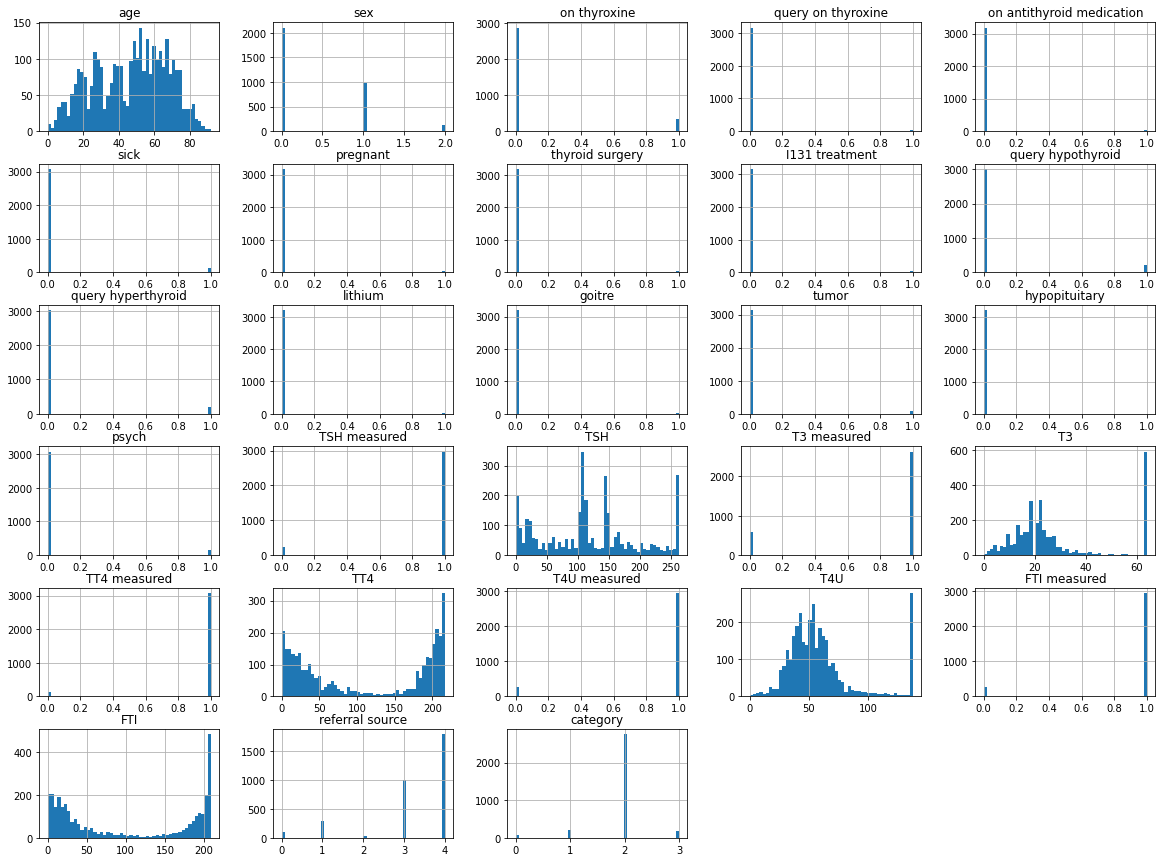

In [55]:
thyroid_data.hist(bins=50,figsize=(20,15))

In [56]:
x = thyroid_data.drop("category",axis=1)
y = thyroid_data["category"]

<AxesSubplot:xlabel='category', ylabel='count'>

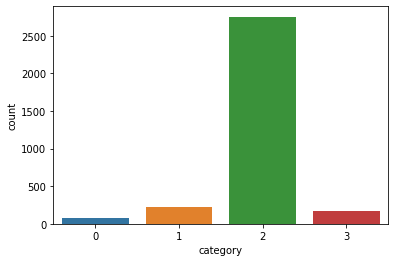

In [57]:
sns.countplot(thyroid_data['category'])

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'referral source'],
      dtype='object')

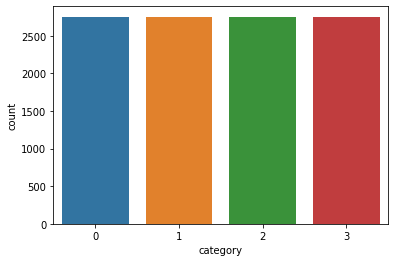

In [58]:
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE


rdsmple=RandomOverSampler()
x_sampled,y_sampled=rdsmple.fit_resample(x,y)

x_sampled.shape


x_sampled=pd.DataFrame(data=x_sampled,columns=x.columns)


x_sampled


sns.countplot(y_sampled)


x_sampled.columns

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x, y,test_size=0.25, random_state=42)
x_train.shape,x_test.shape

((2415, 27), (806, 27))

In [60]:
x_train.corr()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source
age,1.000000,-0.019420,0.012450,-0.035056,-0.065136,0.091038,-0.128220,-0.046007,0.054524,0.028937,...,-0.055192,0.067394,-0.179048,0.052521,-0.025578,0.082488,-0.182739,0.082558,-0.091885,0.103497
sex,-0.019420,1.000000,-0.082770,0.003125,-0.041003,-0.012946,-0.080669,-0.056927,-0.020106,-0.029079,...,-0.005280,0.087077,-0.097558,0.006220,0.072090,-0.018402,-0.096496,-0.019451,-0.020025,-0.078573
on thyroxine,0.012450,-0.082770,1.000000,0.001279,-0.010085,-0.050931,0.003837,0.031789,0.085789,0.055120,...,-0.110579,-0.190202,0.182744,-0.023290,-0.086888,0.001424,0.036182,0.000907,-0.086403,0.165681
query on thyroxine,-0.035056,0.003125,0.001279,1.000000,-0.012403,0.040815,0.015571,0.017681,-0.016898,-0.032946,...,0.062737,-0.023095,0.008009,0.025596,-0.006449,0.025128,-0.024511,0.025003,0.016647,0.047057
on antithyroid medication,-0.065136,-0.041003,-0.010085,-0.012403,1.000000,-0.022129,0.058439,-0.011471,0.015677,-0.011617,...,-0.038740,0.006193,0.024305,-0.039150,-0.004635,-0.041032,0.066392,-0.041271,0.021325,0.023868
sick,0.091038,-0.012946,-0.050931,0.040815,-0.022129,1.000000,-0.025467,-0.024266,-0.030150,0.059992,...,0.001091,0.040434,-0.087774,0.015925,0.055474,0.009892,-0.045516,0.009595,-0.032355,-0.024604
pregnant,-0.128220,-0.080669,0.003837,0.015571,0.058439,-0.025467,1.000000,-0.013201,-0.016401,-0.017880,...,-0.085737,0.009708,0.061961,0.024843,-0.051051,0.036324,0.169142,0.036229,0.045339,-0.209436
thyroid surgery,-0.046007,-0.056927,0.031789,0.017681,-0.011471,-0.024266,-0.013201,1.000000,-0.015628,-0.030470,...,-0.006128,-0.004800,-0.004995,0.023672,0.009346,0.008076,0.013409,0.007928,0.024733,0.038037
I131 treatment,0.054524,-0.020106,0.085789,-0.016898,0.015677,-0.030150,-0.016401,-0.015628,1.000000,0.022008,...,-0.004100,-0.035706,0.045541,0.029412,-0.010394,0.021502,-0.006984,0.021343,0.013270,0.094950
query hypothyroid,0.028937,-0.029079,0.055120,-0.032946,-0.011617,0.059992,-0.017880,-0.030470,0.022008,1.000000,...,0.039481,-0.082670,0.041770,-0.007452,0.038845,-0.032325,0.023328,-0.032795,0.016821,0.029305


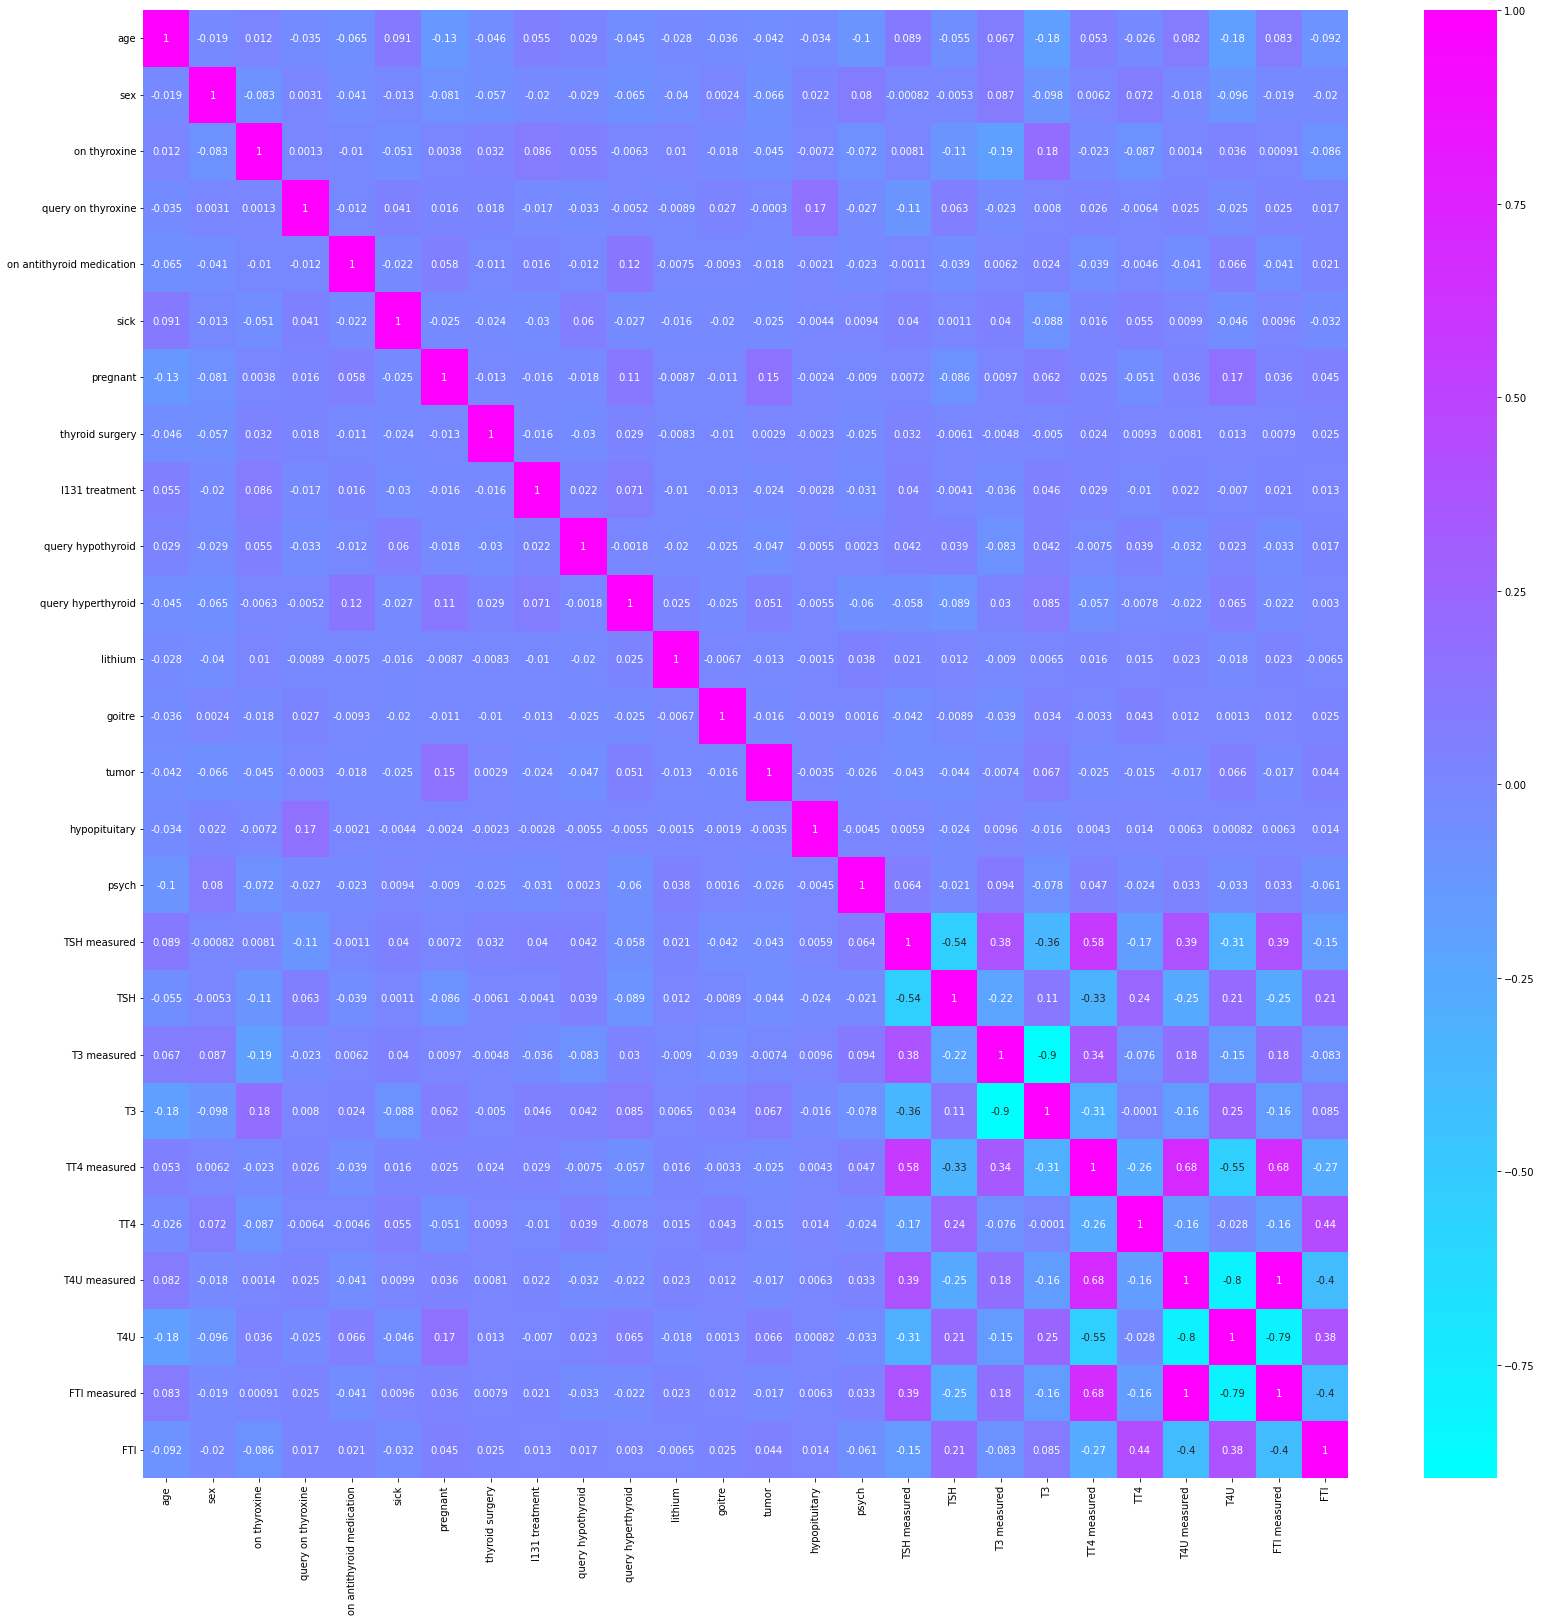

In [61]:
#using pearson correlation
plt.figure(figsize=(27,27))
corr = x_train.iloc[:,:-1].corr()
top_features=corr.index
sns.heatmap(corr, annot=True, cmap=plt.cm.cool)
plt.show()

In [62]:
#find and remove correlated features
def correlation(dataset,threshold):
  col_corr = set()    #set of all the names of correlated columns
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if (corr_matrix.iloc[i,j]) > threshold: #we are interested in absolute correlated value
        colname = corr_matrix.columns[i] #getting the names of columns
        col_corr.add(colname)
  return col_corr

In [63]:
cor_features = correlation(x_train, 0.8)
len(set(cor_features))

1

In [64]:
cor_features

{'FTI measured'}

# Univariate Selection

In [65]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [66]:
ordered_rank_features = SelectKBest(score_func=chi2,k=26)
ordered_features=ordered_rank_features.fit(x_train,y_train)

In [67]:
dfscore=pd.DataFrame(ordered_features.scores_,columns=['score'])
dfcolumns=pd.DataFrame(x_train.columns)

In [68]:
features_rank=pd.concat([dfcolumns,dfscore],axis=1)

In [69]:
features_rank.columns=['features','score']
features_rank

,features,score
0,age,569.131401
1,sex,8.571623
2,on thyroxine,29.040434
3,query on thyroxine,1.774572
4,on antithyroid medication,1.936043
5,sick,23.253544
6,pregnant,24.320017
7,thyroid surgery,2.617498
8,I131 treatment,3.818893
9,query hypothyroid,9.242234


In [70]:
features_rank.nlargest(27,'score')

,features,score
17,TSH,8379.761530
19,T3,2158.834997
25,FTI,1977.772856
21,TT4,1762.330586
23,T4U,1019.042242
0,age,569.131401
10,query hyperthyroid,59.040436
13,tumor,52.117487
2,on thyroxine,29.040434
6,pregnant,24.320017


In [71]:
col_to_drop=["query on thyroxine","on antithyroid medication","thyroid surgery","I131 treatment","lithium","goitre","hypopituitary","psych","TSH measured","T3 measured","TT4 measured","T4U measured","FTI measured"]

In [72]:
x_train=x_train.drop(col_to_drop,axis=1)
x_test=x_test.drop(col_to_drop,axis=1)

In [73]:
x_train.head()

,age,sex,on thyroxine,sick,pregnant,query hypothyroid,query hyperthyroid,tumor,TSH,T3,TT4,T4U,FTI,referral source
1234,44,0,0,0,0,0,0,0,24,21,24,58,18,1
814,63,1,0,0,0,0,0,0,34,23,216,39,17,3
1190,21,0,0,0,0,0,0,0,73,22,12,49,18,4
1100,46,1,0,0,0,0,0,0,18,22,204,49,200,4
2193,35,1,0,0,0,0,0,0,107,17,201,16,36,4


In [74]:
x_train.shape,x_test.shape

((2415, 14), (806, 14))

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
scaled_train = scaler.transform(x_train)
scaler.fit(x_test)
scaled_test = scaler.transform(x_test)

In [76]:
scaled_train

array([[-0.12319961, -0.68535893, -0.35330629, ..., -0.05873287,
        -0.97657572, -2.1187803 ],
       [ 0.81164646,  1.09245182, -0.35330629, ..., -0.68605075,
        -0.988436  , -0.25199649],
       [-1.25485538, -0.68535893, -0.35330629, ..., -0.35588344,
        -0.97657572,  0.68139542],
       ...,
       [-0.86123598,  1.09245182, -0.35330629, ...,  0.27143444,
         0.93293083,  0.68139542],
       [ 0.81164646,  1.09245182, -0.35330629, ...,  2.58260559,
         1.28873951, -0.25199649],
       [ 1.15606343,  1.09245182, -0.35330629, ..., -0.55398383,
        -1.00029629, -0.25199649]])

# SVM

In [77]:
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

svc = SVC(kernel="linear")
svc.fit(scaled_train,y_train)

SVC(kernel='linear')

In [78]:
y_pred=svc.predict(scaled_test)
accuracy_score(y_test,y_pred)

0.8560794044665012

In [79]:
confusion_matrix(y_test,y_pred)

array([[  0,   0,  15,   0],
       [  0,   0,  61,   0],
       [  0,   0, 690,   0],
       [  0,   0,  40,   0]], dtype=int64)

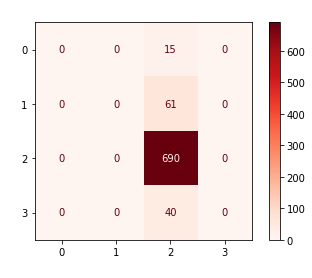

In [80]:
matrix = plot_confusion_matrix(svc,scaled_test,y_test,cmap=plt.cm.Reds)
matrix.ax_.set_title('confusion Matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.show()

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.00      0.00      0.00        61
           2       0.86      1.00      0.92       690
           3       0.00      0.00      0.00        40

    accuracy                           0.86       806
   macro avg       0.21      0.25      0.23       806
weighted avg       0.73      0.86      0.79       806



In [82]:
svc = SVC(kernel="sigmoid")
svc.fit(scaled_train,y_train)

SVC(kernel='sigmoid')

In [83]:
y_pred=svc.predict(scaled_test)

accuracy_score(y_test,y_pred)

0.8176178660049628

In [84]:
confusion_matrix(y_test,y_pred)

array([[  1,   0,  14,   0],
       [  0,   2,  58,   1],
       [  4,  27, 656,   3],
       [  1,   7,  32,   0]], dtype=int64)

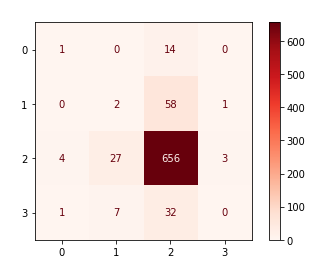

In [85]:
matrix = plot_confusion_matrix(svc,scaled_test,y_test,cmap=plt.cm.Reds)
matrix.ax_.set_title('confusion Matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.show()

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.17      0.07      0.10        15
           1       0.06      0.03      0.04        61
           2       0.86      0.95      0.90       690
           3       0.00      0.00      0.00        40

    accuracy                           0.82       806
   macro avg       0.27      0.26      0.26       806
weighted avg       0.75      0.82      0.78       806



In [87]:
svc = SVC(kernel="rbf")
svc.fit(scaled_train,y_train)

SVC()

In [88]:
y_pred=svc.predict(scaled_test)
accuracy_score(y_test,y_pred)

0.8560794044665012

In [89]:
confusion_matrix(y_test,y_pred)

array([[  0,   0,  15,   0],
       [  0,   0,  61,   0],
       [  0,   0, 690,   0],
       [  0,   0,  40,   0]], dtype=int64)

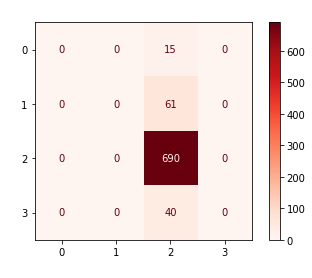

In [90]:
matrix = plot_confusion_matrix(svc,scaled_test,y_test,cmap=plt.cm.Reds)
matrix.ax_.set_title('confusion Matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.show()

In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.00      0.00      0.00        61
           2       0.86      1.00      0.92       690
           3       0.00      0.00      0.00        40

    accuracy                           0.86       806
   macro avg       0.21      0.25      0.23       806
weighted avg       0.73      0.86      0.79       806



In [92]:
svc = SVC(kernel="poly")
svc.fit(scaled_train,y_train)

SVC(kernel='poly')

In [93]:
y_pred=svc.predict(scaled_test)
accuracy_score(y_test,y_pred)

0.8399503722084367

In [94]:
confusion_matrix(y_test,y_pred)

array([[  0,   0,  15,   0],
       [  0,   0,  60,   1],
       [  7,   3, 677,   3],
       [  0,   0,  40,   0]], dtype=int64)

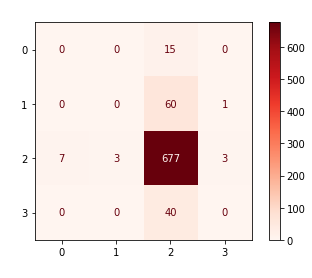

In [95]:
matrix = plot_confusion_matrix(svc,scaled_test,y_test,cmap=plt.cm.Reds)
matrix.ax_.set_title('confusion Matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.show()

In [96]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.00      0.00      0.00        61
           2       0.85      0.98      0.91       690
           3       0.00      0.00      0.00        40

    accuracy                           0.84       806
   macro avg       0.21      0.25      0.23       806
weighted avg       0.73      0.84      0.78       806



KNN

In [97]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [98]:
knn.fit(scaled_train,y_train)
y_pred=knn.predict(scaled_test)
accuracy_score(y_test,y_pred)

0.705955334987593

In [99]:
confusion_matrix(y_test,y_pred)

array([[  0,   0,  13,   2],
       [  0,   2,  56,   3],
       [ 25,  57, 564,  44],
       [  3,   2,  32,   3]], dtype=int64)

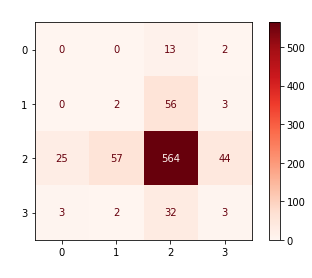

In [100]:
matrix = plot_confusion_matrix(knn,scaled_test,y_test,cmap=plt.cm.Reds)
matrix.ax_.set_title('confusion Matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.show()

In [101]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.03      0.03      0.03        61
           2       0.85      0.82      0.83       690
           3       0.06      0.07      0.07        40

    accuracy                           0.71       806
   macro avg       0.23      0.23      0.23       806
weighted avg       0.73      0.71      0.72       806



In [102]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=10)
gb.fit(scaled_train,y_train)
y_pred=gb.predict(scaled_test)
accuracy_score(y_test,y_pred)

0.8560794044665012

In [103]:
confusion_matrix(y_test,y_pred)

array([[  0,   0,  15,   0],
       [  0,   0,  61,   0],
       [  0,   0, 690,   0],
       [  0,   0,  40,   0]], dtype=int64)

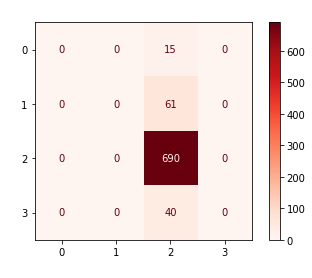

In [104]:
matrix = plot_confusion_matrix(gb,scaled_test,y_test,cmap=plt.cm.Reds)
matrix.ax_.set_title('confusion Matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.show()

#Decision Tree

In [105]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(scaled_train,y_train)
y_pred=dt.predict(scaled_test)
accuracy_score(y_test,y_pred)

0.7245657568238213

In [106]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [107]:
rf.fit(scaled_train,y_train)
y_pred=rf.predict(scaled_test)
accuracy_score(y_test,y_pred)

0.7481389578163772

In [108]:
confusion_matrix(y_test,y_pred)

array([[  0,   0,  15,   0],
       [  0,   0,  58,   3],
       [ 18,  38, 601,  33],
       [  2,   1,  35,   2]], dtype=int64)

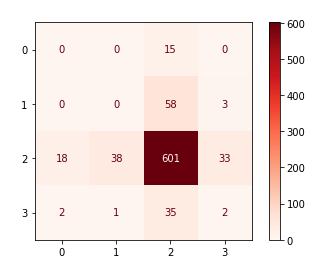

In [109]:
matrix = plot_confusion_matrix(rf,scaled_test,y_test,cmap=plt.cm.Reds)
matrix.ax_.set_title('confusion Matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.show()

In [110]:
classifier_forest = RandomForestClassifier(criterion = 'entropy')
classifier_forest.fit(x_train,y_train)
y_pred = classifier_forest.predict(scaled_test)

print(f'Train Score:{classifier_forest.score(x_train,y_train)}\n Test Score:{classifier_forest.score(x_test,y_test)}')

Train Score:0.8923395445134575
 Test Score:0.7419354838709677


In [111]:
accuracy_score(y_test,y_pred)

0.8560794044665012